In [11]:
from png import Reader
import numpy as np
import matplotlib.pyplot as plt

width1, height1, pixels1, info1 =  Reader(filename="scrambled1.png").asRGBA8()
width2, height2, pixels2, info2 =  Reader(filename="scrambled2.png").asRGBA8()

pixels1 = list(pixels1)
pixels2 = list(pixels2)

print(f"Image 1: {width1}x{height1}, Image 2: {width2}x{height2}")

Image 1: 256x256, Image 2: 256x256


v_max: 0


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

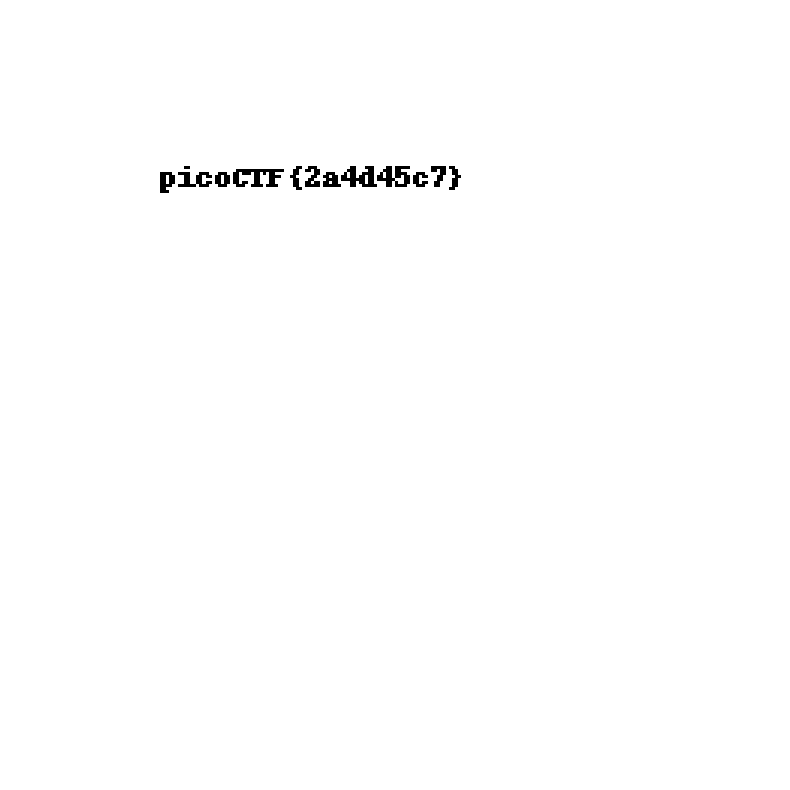

In [54]:
def clamp(value, min_value, max_value):
    return max(min_value, min(value, max_value))

v_max = 0
data = np.zeros((height1, width1, 4), dtype=np.uint8)
for y in range(height1):
    row1 = pixels1[y]
    row2 = pixels2[y]
    new_row = []
    for x in range(width1):
        r1 = row1[x*4]
        g1 = row1[x*4+1]
        b1 = row1[x*4+2]
        a1 = row1[x*4+3]

        r2 = row2[x*4]
        g2 = row2[x*4+1]
        b2 = row2[x*4+2]
        a2 = row2[x*4+3]

        def f(v):
            global v_max
            if v == 1: return 1
            return 0

        new_r = clamp(f((r1 ^ r2) / 255) * 255, 0, 255)
        new_g = clamp(f((g1 ^ g2) / 255) * 255, 0, 255)
        new_b = clamp(f((b1 ^ b2) / 255) * 255, 0, 255)
        new_a = 255

        new_row.extend([new_r, new_g, new_b, new_a])
    data[y] = np.array(new_row, dtype=np.uint8).reshape((width1, 4))

print(f"v_max: {v_max}")

plt.figure(figsize=(10, 10))
plt.imshow(data)
plt.axis('off')